In [1]:
import sklearn
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata
import re
import importlib.util
#spec = importlib.util.spec_from_file_location("ScanpyUtilsMT", os.path.expanduser("~/code/pollye/MTsc/utils/ScanpyUtilsMT.py"))
#sc_utils = importlib.util.module_from_spec(spec)
#spec.loader.exec_module(sc_utils)

In [139]:
headpath='/scrapp2/mtschmitz/macaqueseq2/'
adatapaths=[os.path.join(headpath,x) for x in  os.listdir('/scrapp2/mtschmitz/macaqueseq2/')]
samplenames=[re.sub('_Out','',x) for x in  os.listdir('/scrapp2/mtschmitz/macaqueseq2/')]

for adatapath,samplename in zip(np.array(adatapaths)[::-1],np.array(samplenames)[::-1]):
    sc.settings.figdir=os.path.expanduser('~/figs/'+samplename)
    if not os.path.exists(sc.settings.figdir):
            os.makedirs(sc.settings.figdir)
    if not os.path.exists(os.path.join(adatapath,'outs/ambientsubtracted.h5ad')):
        continue
    adata=sc.read_10x_mtx(os.path.join(adatapath,'outs/filtered_feature_bc_matrix'),cache=True)
    sc.pp.filter_genes(adata, min_cells=15,inplace=True)
    sc.pp.filter_cells(adata,min_counts=5,inplace=True)
    ambinotadata=sc.read_h5ad(os.path.join(adatapath,'outs/ambientsubtracted.h5ad'))
    sc.pp.filter_genes(ambinotadata, min_cells=15,inplace=True)
    sc.pp.filter_cells(ambinotadata,min_counts=5,inplace=True)
    cells=list(set(adata.obs.index) & set(ambinotadata.obs.index)) 
    genes=list(set(adata.var.index) & set(ambinotadata.var.index)) 
    
    ambinotadata._inplace_subset_obs(cells)
    ambinotadata._inplace_subset_var(genes)
    adata._inplace_subset_obs(cells)
    adata._inplace_subset_var(genes)
    sns.distplot((adata.X-ambinotadata.X).sum(1).A1,kde=False)
    plt.savefig(os.path.join(sc.settings.figdir,'CountDifferences.png'))
    plt.close()
    
    condit='Original'
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    vg=sc.pp.highly_variable_genes(adata,n_top_genes=adata.shape[0],inplace=False)
    adata._inplace_subset_var(vg['highly_variable'])
    sc.pp.scale(adata, max_value=10)
    sc.pp.pca(adata)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    sc.tl.leiden(adata)
    sc.pl.umap(adata, color=['leiden'],save=condit+"Leiden")
    sc_utils.marker_analysis(adata,variables=['leiden'],markerpath=os.path.expanduser('~/markers.txt'),prefix=condit)
    condit='Ambiaint'
    sc.pp.normalize_total(ambinotadata, target_sum=1e4)
    sc.pp.log1p(ambinotadata)
    ambinotadata._inplace_subset_var(vg['highly_variable'])
    sc.pp.scale(ambinotadata, max_value=10)
    sc.pp.pca(ambinotadata)
    sc.pp.neighbors(ambinotadata)
    sc.tl.umap(ambinotadata)
    sc.tl.leiden(ambinotadata)
    sc.pl.umap(ambinotadata, color=['leiden'],save=condit+"Leiden")
    sc_utils.marker_analysis(ambinotadata,variables=['leiden'],markerpath=os.path.expanduser('~/markers.txt'),prefix=condit) 
    pd.DataFrame([sklearn.metrics.silhouette_score(adata.X,adata.obs['leiden']) ,sklearn.metrics.silhouette_score(ambinotadata.X,adata.obs['leiden'])],index=['Original','Ambiaint']).to_csv(os.path.join(sc.settings.figdir,"SpectralScores.csv"))
    


FileNotFoundError: [Errno 2] No such file or directory: '/scrapp2/mtschmitz/macaqueseq2/'

In [141]:
#Assess cluster enrichment
df=pd.read_csv('/home/mt/Downloads/figs/E65-2019B_HIPPOCAMPUS_CHOROID/leidenAmbiaintMarkerSumStats.csv')
df.index=df.iloc[:,0]
#print(df.loc[:,df.iloc[0,:]=='mean'].iloc[2:,:-4])
statmat=df.loc[:,df.iloc[0,:]=='mean'].iloc[2:,:-4]
statmat=statmat.loc[:,['lda' not in x for x in statmat.columns]]
statmat=statmat.loc[:,['counts' not in x for x in statmat.columns]]
maxval=statmat.max(axis=1)#-statmat.median(axis=1)
celltype=[re.sub('.1','',x) for x in  statmat.astype('float').idxmax(axis=1)]
ambtab=pd.DataFrame(list(maxval),index=celltype)

FileNotFoundError: [Errno 2] File b'/home/mt/Downloads/figs/E65-2019B_HIPPOCAMPUS_CHOROID/leidenAmbiaintMarkerSumStats.csv' does not exist: b'/home/mt/Downloads/figs/E65-2019B_HIPPOCAMPUS_CHOROID/leidenAmbiaintMarkerSumStats.csv'

In [142]:
#Assess cluster enrichment
df=pd.read_csv('/home/mt/Downloads/figs/E65-2019B_HIPPOCAMPUS_CHOROID/leidenOriginalMarkerSumStats.csv')
df.index=df.iloc[:,0]
#print(df.loc[:,df.iloc[0,:]=='mean'].iloc[2:,:-4])
statmat=df.loc[:,df.iloc[0,:]=='mean'].iloc[2:,:-4]
statmat=statmat.loc[:,['lda' not in x for x in statmat.columns]]
statmat=statmat.loc[:,['counts' not in x for x in statmat.columns]]
maxval=statmat.max(axis=1)#-statmat.median(axis=1)
celltype=[re.sub('.1','',x) for x in  statmat.astype('float').idxmax(axis=1)]
origtab=pd.DataFrame(list(maxval),index=celltype)

FileNotFoundError: [Errno 2] File b'/home/mt/Downloads/figs/E65-2019B_HIPPOCAMPUS_CHOROID/leidenOriginalMarkerSumStats.csv' does not exist: b'/home/mt/Downloads/figs/E65-2019B_HIPPOCAMPUS_CHOROID/leidenOriginalMarkerSumStats.csv'

In [143]:
print(origtab)
print(ambtab)

                                     0
Layer 6 Neuron                0.188523
Layer 5 Neuron                0.100224
Intermediate Progenitor Cell  0.555856
 Ependymal Cell               0.567261
Fibrous Astrocyte             1.161502
G2 Phase Proliferating Cell   0.348042
Intermediate Progenitor Cell  0.611109
Layer 5 Neuron                0.152691
G2 Phase Proliferating Cell   0.339568
Intermediate Progenitor Cell  0.574009
Microglia                     1.838979
Blood                         4.246999
Oligodendrocyte               1.300920
G2 Phase Proliferating Cell   1.713287
Meningeal Fibroblast          5.860657
Layer Astrocyte               2.201418
Microglia                     2.876634
                                     0
Layer 5 Neuron                0.095293
Intermediate Progenitor Cell  0.612015
Layer 6 Neuron                0.190215
Fibrous Astrocyte             1.143265
 Ependymal Cell               0.564654
 Radial Glia                  0.272417
G2 Phase Proliferating Ce

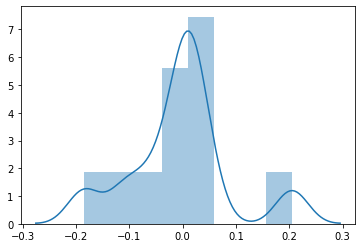

-0.006713874412305431

In [140]:
diffvals=[]
for c in set(origtab.index) & set(ambtab.index):
    #print(c)
    #print(origtab.loc[c,0].mean()-ambtab.loc[c,0].mean())
    diffvals.append(origtab.loc[c,0].mean()-ambtab.loc[c,0].mean())
sns.distplot(diffvals)
plt.show()
np.mean(diffvals)

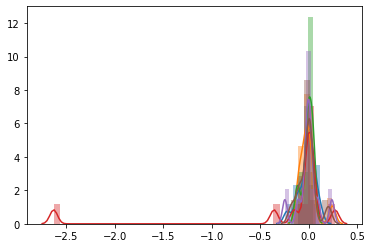

In [144]:
headpath='/home/mt/Downloads/figs/'
adatapaths=[os.path.join(headpath,x) for x in  os.listdir(headpath)]
samplenames=[re.sub('_Out','',x) for x in  os.listdir(headpath)]
samplesdone=[]
alldiffs=[]
for adatapath,samplename in zip(np.array(adatapaths)[::-1],np.array(samplenames)[::-1]):
    if not os.path.exists(os.path.join(adatapath,'leidenAmbiaintMarkerSumStats.csv')):
        continue
    samplesdone.append(samplename)
    df=pd.read_csv(os.path.join(adatapath,'leidenAmbiaintMarkerSumStats.csv'))
    df.index=df.iloc[:,0]
    #print(df.loc[:,df.iloc[0,:]=='mean'].iloc[2:,:-4])
    statmat=df.loc[:,df.iloc[0,:]=='mean'].iloc[2:,:-4]
    statmat=statmat.loc[:,['lda' not in x for x in statmat.columns]]
    statmat=statmat.loc[:,['counts' not in x for x in statmat.columns]]
    maxval=statmat.max(axis=1)-statmat.median(axis=1)
    celltype=[re.sub('.1','',x) for x in  statmat.astype('float').idxmax(axis=1)]
    ambtab=pd.DataFrame(list(maxval),index=celltype)
    df=pd.read_csv(os.path.join(adatapath,'leidenOriginalMarkerSumStats.csv'))
    df.index=df.iloc[:,0]
    #print(df.loc[:,df.iloc[0,:]=='mean'].iloc[2:,:-4])
    statmat=df.loc[:,df.iloc[0,:]=='mean'].iloc[2:,:-4]
    statmat=statmat.loc[:,['lda' not in x for x in statmat.columns]]
    statmat=statmat.loc[:,['counts' not in x for x in statmat.columns]]
    maxval=statmat.max(axis=1)-statmat.median(axis=1)
    celltype=[re.sub('.1','',x) for x in  statmat.astype('float').idxmax(axis=1)]
    origtab=pd.DataFrame(list(maxval),index=celltype)
    diffvals=[]
    for c in set(origtab.index) & set(ambtab.index):
        #print(c)
        #print(origtab.loc[c,0].mean()-ambtab.loc[c,0].mean())
        diffvals.append(origtab.loc[c,0].mean()-ambtab.loc[c,0].mean())
    alldiffs.append(np.mean(diffvals))
    sns.distplot(diffvals)
plt.show()

{'PEC_YALE_SINGLECELLRNASEQ_RMB691_STR': -0.01490535043728111,
 'E65-2019B_MIDBRAIN': -0.004694735927676613,
 'E90-2019_TEMPORAL': -0.008238633008052906,
 'E65-2019B_THALAMUS': -0.229794957375816,
 'E65-2019A_HIPPOCAMPUS_CHOROID': -0.0026521676759743555,
 'PEC_YALE_SINGLECELLRNASEQ_RMB683_CBC': -0.011596102981870486}

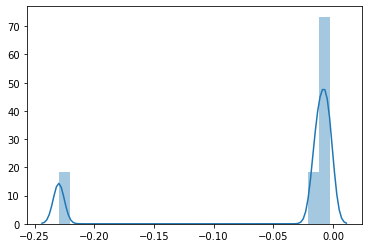

In [145]:
sns.distplot(alldiffs)
dict(zip(samplesdone,alldiffs))


In [26]:

import sys
import os
fn='/home/mt/Downloads/Head-Undetermined_S0_L002_I1_001.fastq'
print(fn)
def process(lines=None):
    ks = ['name', 'sequence', 'optional', 'quality']
    return {k: v for k, v in zip(ks, lines)}

if not os.path.exists(fn):
    raise SystemError("Error: File does not exist\n")
seqs=[]
n = 4
with open(fn, 'r') as fh:
    lines = []
    for line in fh:
        lines.append(line.rstrip())
        if len(lines) == n:
            record = process(lines)
            seqs.append(record['sequence'])
            sys.stderr.write("Record: %s\n" % (str(record)))
            lines = []


/home/mt/Downloads/Head-Undetermined_S0_L002_I1_001.fastq


Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:1009:1016 1:N:0:AGCTATCA', 'sequence': 'AGCTATCA', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:1027:1016 1:N:0:ACCGTATG', 'sequence': 'ACCGTATG', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:1045:1016 1:N:0:GCTTGGCT', 'sequence': 'GCTTGGCT', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:1063:1016 1:N:0:GTCCTTCT', 'sequence': 'GTCCTTCT', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:1081:1016 1:N:0:TCGATACT', 'sequence': 'TCGATACT', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:1099:1016 1:N:0:GGGGGGGG', 'sequence': 'GGGGGGGG', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:1118:1016 1:N:0:CGAGGCTC', 'sequence': 'CGAGGCTC', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:

Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:4300:1078 1:N:0:CGAGGCTC', 'sequence': 'CGAGGCTC', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:4336:1078 1:N:0:AAGACATA', 'sequence': 'AAGACATA', 'optional': '+', 'quality': 'F,F::,F,'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:4354:1078 1:N:0:ATTTGCTA', 'sequence': 'ATTTGCTA', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:4372:1078 1:N:0:CACGAGAA', 'sequence': 'CACGAGAA', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:4390:1078 1:N:0:CTGACTGA', 'sequence': 'CTGACTGA', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:4408:1078 1:N:0:CGCCATCG', 'sequence': 'CGCCATCG', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:4444:1078 1:N:0:ACCGTATG', 'sequence': 'ACCGTATG', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:

Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:2808:1125 1:N:0:TCTTAAAG', 'sequence': 'TCTTAAAG', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:2844:1125 1:N:0:GACCCTAC', 'sequence': 'GACCCTAC', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:2862:1125 1:N:0:GTGGGTGT', 'sequence': 'GTGGGTGT', 'optional': '+', 'quality': 'F:FFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:2899:1125 1:N:0:TGACGCCC', 'sequence': 'TGACGCCC', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:2917:1125 1:N:0:TCAGGGTG', 'sequence': 'TCAGGGTG', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:2953:1125 1:N:0:GTCCTTCT', 'sequence': 'GTCCTTCT', 'optional': '+', 'quality': 'F::FFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:2971:1125 1:N:0:CGAGGCTC', 'sequence': 'CGAGGCTC', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:

Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:5222:1172 1:N:0:GCTTGGCT', 'sequence': 'GCTTGGCT', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:5240:1172 1:N:0:GTAATTGC', 'sequence': 'GTAATTGC', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:5258:1172 1:N:0:GTCCTTCT', 'sequence': 'GTCCTTCT', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:5276:1172 1:N:0:TGCTGTAA', 'sequence': 'TGCTGTAA', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:5294:1172 1:N:0:TCTATCCG', 'sequence': 'TCTATCCG', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:5312:1172 1:N:0:AGCATGGT', 'sequence': 'AGCATGGT', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:5330:1172 1:N:0:CGTGCAGA', 'sequence': 'CGTGCAGA', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [103]:
from collections import Counter
countseqs=Counter(seqs)
observed=np.array(list(countseqs.keys()))[np.array(list(countseqs.values()))>0]


In [104]:
indexes=pd.read_csv('/home/mt/Downloads/chromium-shared-sample-indexes-plate.csv',header=None,index_col=0)
indexes=pd.concat([indexes.loc[:,x] for x in indexes.columns])

In [105]:
indexmatch=[indexes.index[indexes==x].tolist() for x in observed ]
flat_list = list(set([item for sublist in indexmatch for item in sublist]))

In [111]:
sorted(flat_list)

['SI-GA-A10',
 'SI-GA-A8',
 'SI-GA-A9',
 'SI-GA-B10',
 'SI-GA-B7',
 'SI-GA-B8',
 'SI-GA-B9',
 'SI-GA-C10',
 'SI-GA-C7',
 'SI-GA-C8',
 'SI-GA-C9',
 'SI-GA-D10',
 'SI-GA-D7',
 'SI-GA-D8',
 'SI-GA-D9',
 'SI-GA-E10',
 'SI-GA-F10',
 'SI-GA-F7',
 'SI-GA-F9',
 'SI-GA-G10',
 'SI-GA-G9',
 'SI-GA-H10',
 'SI-GA-H7',
 'SI-GA-H8',
 'SI-GA-H9']